DATA ANALYSIS AND DATA SCIENCE USING PYTHON

TASK - 1 : Data Analysis Project Using Python

Objective :
Analyze a dataset of student exam scores and answer specific questions, presenting findings
using Python libraries and techniques for data analysis.

a. Data Loading

● Load the dataset using pandas.

● Display the first few rows using .head().

In [1]:
# Imported Libraries

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Data Preview
df1 = pd.read_csv('stud-mat.csv')
df2 = pd.read_csv('stud-por.csv')

print("total columns in stud-mat : " , len(df1.columns))
print("total columns in stud-por : " , len(df2.columns))
common_columns = df1.columns.intersection(df2.columns)
print("Common columns : ", len(common_columns))
print("\nStud-mat : ")
print(df1.head())
print("\nStud-por : ")
print(df2.head())


total columns in stud-mat :  33
total columns in stud-por :  33
Common columns :  33

Stud-mat : 
  school   sex   age  address  famsize  Pstatus   Medu   Fedu        Mjob   \
0     GP    F      18      U      GT3        A        4      4   at_home     
1     GP    F      17      U      GT3        T        1      1   at_home     
2     GP    F      15      U      LE3        T        1      1   at_home     
3     GP    F      15      U      GT3        T        4      2    health     
4     GP    F      16      U      GT3        T        3      3     other     

         Fjob   ... famrel  freetime   goout   Dalc   Walc  health  absences   \
0    teacher    ...       4         3       4      1      1       3         6   
1      other    ...       5         3       3      1      1       3         4   
2      other    ...       4         3       2      2      3       3        10   
3   services    ...       3         2       2      1      1       5         2   
4      other    ...       4 

b. Data Exploration

● Check for missing values using .isnull().sum().

● Display column data types using .dtypes.

● Understand the dataset's size using .shape.

In [3]:
# Understanding Dataset

print("Shape of stud-mat : " ,df1.shape)
print("Shape of stud-por : " ,df2.shape)
print("Size of stud-mat : " ,df1.size)
print("Size of stud-por : " ,df2.size)
print("\nDtype of stud-mat : \n" ,df1.dtypes)
print("\nDtype of stud-por : \n" ,df2.dtypes)
print("\nNumber of null values in each column of stud-mat : \n", df1.isnull().sum())
print("\nNumber of null values in each column of stud-por : \n", df1.isnull().sum())
## Since all values are zero therefore no null values are present


Shape of stud-mat :  (395, 33)
Shape of stud-por :  (649, 33)
Size of stud-mat :  13035
Size of stud-por :  21417

Dtype of stud-mat : 
 school         object
sex            object
age             int64
address        object
famsize        object
Pstatus        object
Medu            int64
Fedu            int64
Mjob           object
Fjob           object
reason         object
guardian       object
traveltime      int64
studytime       int64
failures        int64
schoolsup      object
famsup         object
paid           object
activities     object
nursery        object
higher         object
internet       object
romantic       object
famrel          int64
freetime        int64
goout           int64
Dalc            int64
Walc            int64
health          int64
absences        int64
G1              int64
G2              int64
G3              int64
dtype: object

Dtype of stud-por : 
 school         object
sex            object
age             int64
address        object
famsize     

c. Data Cleaning

● Handle missing values (e.g., replace them with the median or remove rows).

● Remove duplicate entries using .drop_duplicates().

In [4]:
## As mentioned above no missing data is present
duplicate_count_for_df1 = df1.duplicated().sum()
print("Number of duplicate rows for df1 : ", duplicate_count_for_df1)
duplicate_count_for_df2 = df2.duplicated().sum()
print("Number of duplicate rows for df2 : ", duplicate_count_for_df2)

## No duplicate rows are present

Number of duplicate rows for df1 :  0
Number of duplicate rows for df2 :  0


d. Data Analysis Questions
1. What is the average score in math (G3)?
2. How many students scored above 15 in their final grade (G3)?
3. Is there a correlation between study time (study time) and the final grade (G3)?
4. Which gender has a higher average final grade (G3)?

Merged DataFrame without duplicates :    school   sex   age  address  famsize  Pstatus   Medu   Fedu        Mjob   \
0     GP    F      18      U      GT3        A        4      4   at_home     
1     GP    F      17      U      GT3        T        1      1   at_home     
2     GP    F      15      U      LE3        T        1      1   at_home     
3     GP    F      15      U      GT3        T        4      2    health     
4     GP    F      16      U      GT3        T        3      3     other     

         Fjob   ... famrel  freetime   goout   Dalc   Walc  health  absences   \
0    teacher    ...       4         3       4      1      1       3         6   
1      other    ...       5         3       3      1      1       3         4   
2      other    ...       4         3       2      2      3       3        10   
3   services    ...       3         2       2      1      1       5         2   
4      other    ...       4         3       2      1      2       5         4   

  G1 

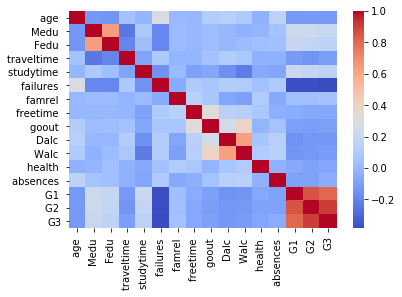


4. Average final grade (G3) by Gender:
sex 
 F      11.448393
 M      11.203091
Name: G3, dtype: float64
Gender with the higher average final grade (G3):  F  
Average final grade (G3): 11.448392554991539


In [5]:
# Merging and removing duplicates
merged_df = pd.merge(df1, df2, how='outer')#, suffixes=('_df1', '_df2'))
merged_df_no_duplicates = merged_df.drop_duplicates()
df3 = merged_df_no_duplicates
print("Merged DataFrame without duplicates : " , df3.head()) # No duplicate rows 

print("\n1. Average score in math (G3) : " ,df3['G3'].mean())

print("\n2. No. of students scored above 15 in their final grade (G3) : " , (df3['G3'] > 15).sum())

print("\n3. Correlation between study time (study time) and the final grade (G3) : " , df3['studytime '].corr(df3['G3']))
print("   Therefore, study time and G3 has a weak positive correlation")

'''
study time and G3 has a weak positive correlation , This suggests that as one variable increases
the other variable might also increase, but the relationship is not consistent or significant enough to make 
strong predictions.
'''
# Visualize Correlation
sns.heatmap(df3.corr(), annot=False, cmap='coolwarm', fmt='.2f')
plt.show()


print("\n4. Average final grade (G3) by Gender:")
gender_avg = df3.groupby('sex ')['G3'].mean()
higher_avg_gender = gender_avg.idxmax()
higher_avg_score = gender_avg.max()
print(gender_avg)
print(f"Gender with the higher average final grade (G3): {higher_avg_gender}")
print(f"Average final grade (G3): {higher_avg_score}")


e. Data Visualization
1. Plot a histogram of final grades (G3).
2. Create a scatter plot between study time (study time) and final grade (G3).
3. Create a bar chart comparing the average scores of male and female students.

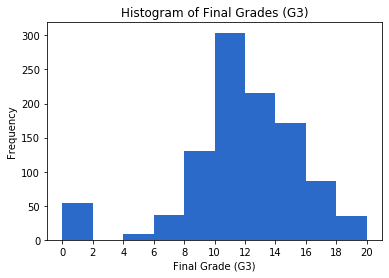

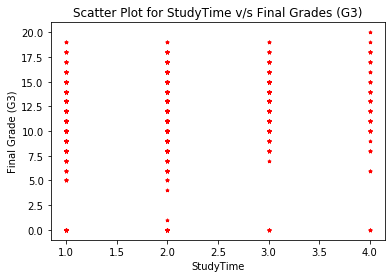

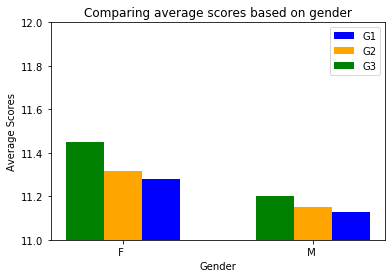

In [6]:

# Histogram of final grades (G3).

df3['G3'].plot(kind='hist' , bins=10 , alpha=.7, color='blue')
plt.hist(df3['G3'] , bins=10 , alpha=.7)
plt.title('Histogram of Final Grades (G3)')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Frequency')
plt.xticks([0,2,4,6,8,10,12,14,16,18,20])
plt.show()


# Scatter Plot between study time (study time) and final grade (G3).

plt.scatter(df3['studytime '] ,df3['G3'] ,color='red' ,marker='*' ,s=10 )
plt.title('Scatter Plot for StudyTime v/s Final Grades (G3)')
plt.xlabel('StudyTime')
plt.ylabel('Final Grade (G3)')
plt.show()


# Bar chart comparing the average scores of male and female students.

average_g1 = df3.groupby('sex ')['G1 '].mean()
average_g2 = df3.groupby('sex ')['G2 '].mean()
average_g3 = df3.groupby('sex ')['G3'].mean()
x=np.arange(len(average_g1))
width=.2
plt.bar(x+width, average_g1, width, label='G1', color='blue')
plt.bar(x, average_g2, width, label='G2', color='orange')
plt.bar(x-width, average_g3, width, label='G3', color='green')
plt.xlabel('Gender')
plt.ylabel('Average Scores')
plt.title('Comparing average scores based on gender')
plt.xticks(x, average_g1.index)  # Set x-axis labels to categories
plt.ylim(11,12)
plt.legend()
plt.show()